<a href="https://colab.research.google.com/github/kanoksaknon/Preditive-PM2.5-from-zeta-sensor/blob/main/495_KNN_SUCESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

495 KNN-SUCESS

In [ ]:
!pip install pandas scikit-learn matplotlib

In [ ]:
pip install seaborn

In [ ]:
from google.colab import files

# Upload data.csv file
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. อ่านข้อมูลจาก CSV file
file_path = 'Hisdata1-1.csv'
df = pd.read_csv(file_path)
df.head()

,date_time,Temperature,Humidity,PM2.5,PM10,CO2
0,19/4/2024 17:17,24.90,0.71,95.0,103.0,5000.0
1,19/4/2024 17:17,26.00,0.65,79.0,83.0,2766.0
2,19/4/2024 17:16,NaN,NaN,NaN,NaN,NaN
3,19/4/2024 17:16,24.90,0.70,91.0,100.0,5000.0
4,19/4/2024 17:16,26.00,0.64,79.0,84.0,2766.0


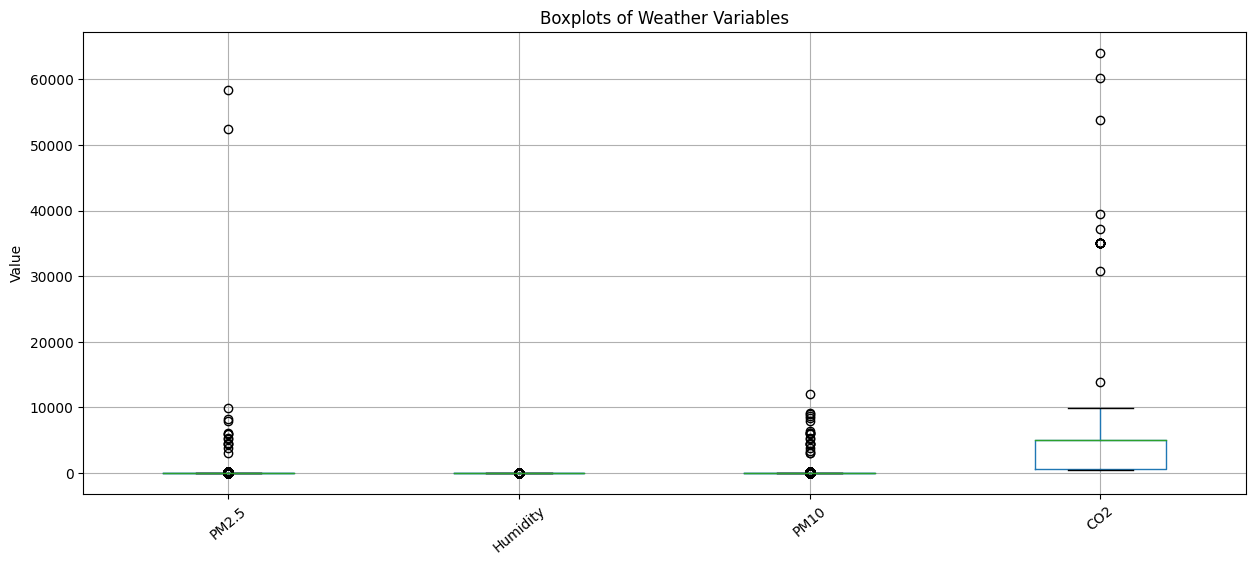

In [ ]:
import matplotlib.pyplot as plt

# Specify the columns you want to create boxplots for
columns_for_boxplots = ['Temperature', 'PM2.5', 'Humidity', 'PM10', 'CO2']

# Create a boxplot for each selected column
plt.figure(figsize=(15, 6))  # Set the figure size
df[columns_for_boxplots].boxplot()
plt.title('Boxplots of Weather Variables')
plt.ylabel('Value')
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability if needed
plt.show()


In [ ]:
print(df.isnull().sum()) # Check for missing values

date_time        0
Temperature    942
Humidity       942
PM2.5          942
PM10           942
CO2            942
dtype: int64


In [ ]:
df.dropna(inplace=True) #missing value เผื่อๆ
print(df.isnull().sum()) # Check for missing values

date_time      0
Temperature    0
Humidity       0
PM2.5          0
PM10           0
CO2            0
dtype: int64


In [ ]:
df.head()

,date_time,Temperature,Humidity,PM2.5,PM10,CO2
0,19/4/2024 17:17,24.9,0.71,95.0,103.0,5000.0
1,19/4/2024 17:17,26,0.65,79.0,83.0,2766.0
3,19/4/2024 17:16,24.9,0.70,91.0,100.0,5000.0
4,19/4/2024 17:16,26,0.64,79.0,84.0,2766.0
5,19/4/2024 17:15,24.9,0.70,94.0,101.0,5000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88678 entries, 0 to 89619
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    88678 non-null  object 
 1   Temperature  88678 non-null  object 
 2   Humidity     88678 non-null  float64
 3   PM2.5        88678 non-null  float64
 4   PM10         88678 non-null  float64
 5   CO2          88678 non-null  float64
dtypes: float64(4), object(2)
memory usage: 6.8+ MB


In [ ]:
# แปลงคอลัมน์ date_time เป็น datetime object
df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M')

# ตั้งค่า date_time เป็น index ของ DataFrame
df.set_index('date_time', inplace=True)

In [ ]:
# กรองข้อมูลโดยลบแถวที่มีค่า 'aquisition fail' ในคอลัมน์ 'PM2.5'
df = df[df['PM2.5'] != 'aquisition fail']

# แปลงค่าในคอลัมน์ 'PM2.5' เป็นชนิดตัวเลข
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

In [ ]:
# เลือก features ที่ต้องการใช้ในการทำนาย (pm2.5, hcho, tvoc, temperature, humidity)
features = ['Temperature', 'Humidity', 'PM10', 'CO2']

# แยก features และ target variable (pm2.5)
X = df[features]
y = df['PM2.5']

In [ ]:
# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ตรวจสอบและลบแถวที่มีค่า 'aquisition fail' ใน X_train และ y_train
train_indices = X_train.index[X_train.isin(['aquisition fail']).any(axis=1)]
X_train = X_train[~X_train.index.isin(train_indices)]
y_train = y_train[~y_train.index.isin(train_indices)]

In [ ]:
# สร้างและฝึกโมเดล KNN Regression
n_neighbors = 5  # จำนวนของเพื่อนบ้านที่ใช้ในการทำนาย
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform', metric='euclidean')
knn_model.fit(X_train, y_train)

# ทดสอบโมเดลบนชุดข้อมูลทดสอบ
y_pred = knn_model.predict(X_test)

In [ ]:
# คำนวณค่า Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.0997113216057794


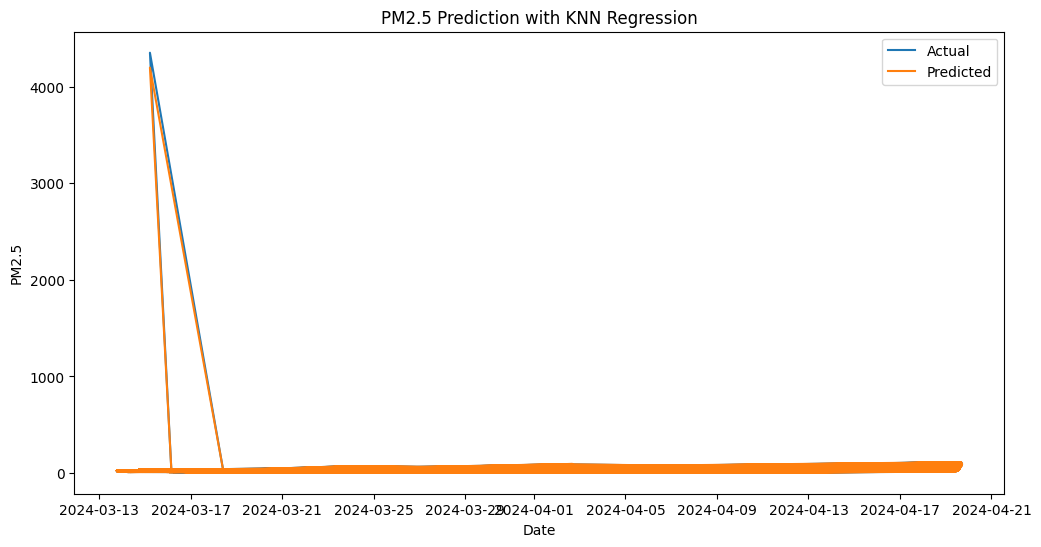

In [ ]:
# พล็อตกราฟผลลัพธ์การทำนาย
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('PM2.5 Prediction with KNN Regression')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

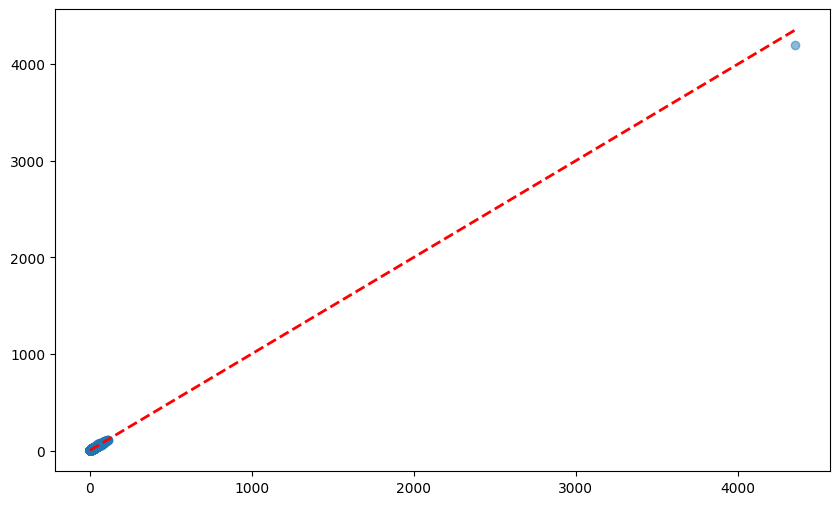

In [ ]:
# พล็อต scatter plot ผลลัพธ์การทำนาย
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # เส้นแทรกเพื่อแสดงค่าที่เท่ากัน

In [ ]:
from sklearn.metrics import r2_score

# คำนวณค่า Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# คำนวณ Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# คำนวณ Root Relative Squared Error (RRSE)
mean_y_test = np.mean(y_test)
rrse = rmse / mean_y_test

# คำนวณค่า R-square (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

print(f'Root Relative Squared Error (RRSE): {rrse}')
print(f'R-square (Coefficient of Determination): {r2}')

Root Relative Squared Error (RRSE): 0.06552046207863133
R-square (Coefficient of Determination): 0.9981895082200753


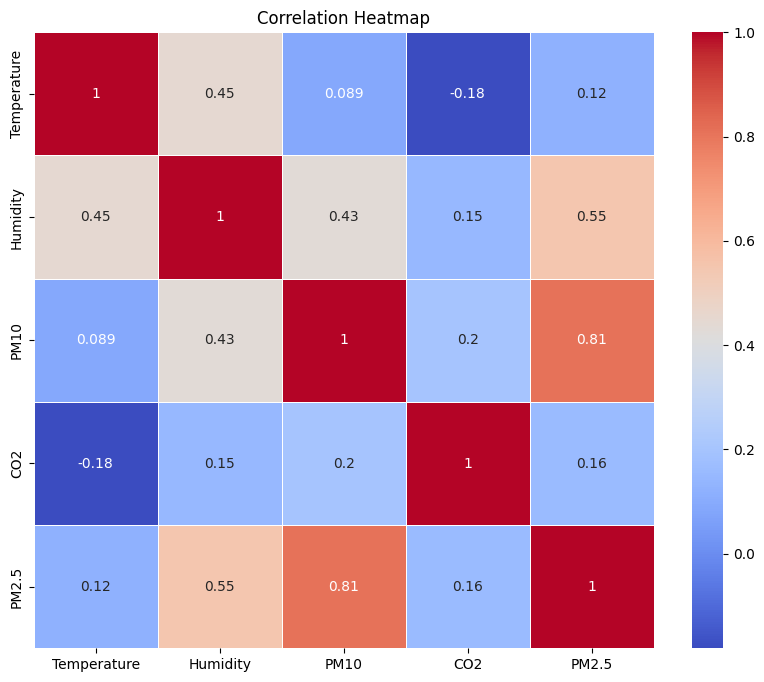

In [ ]:
import seaborn as sns

# รวม X_train และ y_train เพื่อคำนวณ correlation
df_train = pd.concat([X_train, y_train], axis=1)

# คำนวณ correlation matrix
correlation_matrix = df_train.corr()

# พล็อต heatmap ของ correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
